In [43]:
from ema_workbench import ema_logging, load_results
import numpy as np
import matplotlib.pyplot as plt

ema_logging.log_to_stderr(level=ema_logging.INFO)

#load the data
n = 2000
fn = r'../data/{}_runs.tar.gz'.format(n)
experiments, outcomes = load_results(fn)
results = load_results(fn)


[MainProcess/INFO] results loaded succesfully from D:\Workspace\EMAworkbench\ema_workbench\examples\data\2000_runs.tar.gz
[MainProcess/INFO] results loaded succesfully from D:\Workspace\EMAworkbench\ema_workbench\examples\data\2000_runs.tar.gz


In [29]:
from ema_workbench.analysis import prim

In [30]:
default_flow = 2.178849944502783e7
ooi_name = "level_of_achievability"
outcome = outcomes[ooi_name]
outcome = outcome/default_flow
#ooi = outcomes[ooi_name]
#ooi = np.reshape(ooi, (ooi.shape[0]*ooi.shape[1], ooi.shape[2]))
ooi = np.zeros(outcome.shape[0])
temp_outcomes = {ooi_name: ooi}
print ooi.shape

(2000L,)


In [31]:
import scipy as sp

In [38]:
ooi_name = "level_of_achievability"
def classify(data):
    data = data[ooi_name]
    data = data[:,-1]
    classes = np.zeros(data.shape)
    classes[data>0.2] = 1
    return classes

#prim_obj = prim.Prim((experiments, temp_outcomes), classify, threshold=1)
prim_obj = prim.setup_prim(results, classify, mass_min=0.05, threshold=0.75)

In [39]:
box1 = prim_obj.find_box()

[MainProcess/INFO] 2000 points remaining, containing 80 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.509615384615, returning dump box


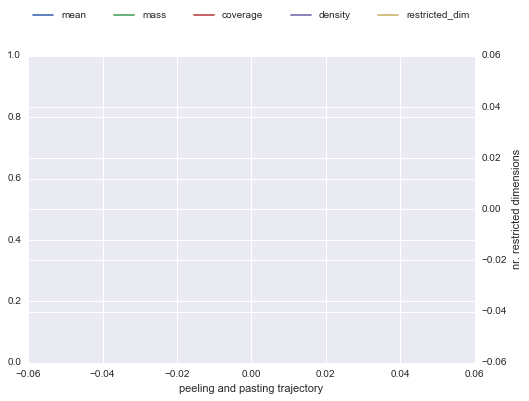

ZeroDivisionError: float division by zero

In [40]:
box1.show_ppt()
box1.show_tradeoff()
plt.show()

In [41]:
box1.write_ppt_to_stdout()

   coverage  density  mass  mean  res dim
0       1.0     0.04   1.0  0.04      0.0




In [42]:
box1.inspect(0)
box1.inspect(1)
box1.inspect(2)
box1.inspect(3)
box1.inspect(4)
box1.inspect(5)

coverage    1.00
density     0.04
mass        1.00
mean        0.04
res dim     0.00
Name: 0, dtype: float64

Empty DataFrame
Columns: [(box 0, min), (box 0, max), (box 0, qp values)]
Index: []



IndexError: single positional indexer is out-of-bounds